In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import xgboost
import lightgbm
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [2]:
data_path = os.getcwd()+'/data'

In [3]:
tr_21_slg_d = pd.read_csv(data_path+'/tr_21_slg_d')
tr_21_obp_d = pd.read_csv(data_path+'/tr_21_obp_d')

In [4]:
### OBP model xgb

In [5]:
dt = tr_21_obp_d
train = dt[dt['GYEAR']!=2021]
test = dt[dt['GYEAR']==2021]

In [6]:
test.reset_index(drop=True,inplace=True)

In [7]:
test[test['NAME'].isin(['이정후'])]

,GYEAR,PCODE,NAME,lag_OBP_1,lag_SLG_1,lag_OPS_1,lag_AGE_Z_OBP_1,lag_AGE_Z_SLG_1,lag_MON_Z_OBP_1,lag_MON_Z_SLG_1,...,lag_BARREL_OUT_PER_1,lag_BARREL_PER_EXPECTED_OUT_1,lag_BARREL_PER_EXPECTED_IN_1,AGE_GRP_1,AGE_GRP_2,AGE_GRP_3,AGE_GRP_4,MON_GRP,BALL,OBP
61,2021,67341,이정후,0.396748,0.524,0.920748,1.445548,1.978517,0.767744,0.756167,...,0.287879,0.028232,0.034921,1.0,0.0,0.0,0.0,1.0,0.0,0.441011


In [8]:
cols = ['lag_OBP_1', 'lag_SLG_1', 'lag_OPS_1',
       'lag_AGE_Z_OBP_1', 'lag_AGE_Z_SLG_1', 'lag_MON_Z_OBP_1',
       'lag_MON_Z_SLG_1', 'lag_IsoW_1', 'lag_IsoP_1', 'lag_WP_GRP_1_1',
       'lag_WP_GRP_2_1', 'lag_WP_GRP_3_1', 'lag_WP_GRP_4_1', 'lag_GPA_1',
       'lag_BABIP_1', 'lag_BB/K_1', 'lag_BARREL_TGS_OUT_CNT_1',
       'lag_BARREL_TGS_IN_CNT_1', 'lag_BARREL_TGS_OUT_BBE_1',
       'lag_BARREL_TGS_IN_BBE_1', 'lag_BARREL_TGS_OUT_PA_1',
       'lag_BARREL_TGS_IN_PA_1', 'lag_BARREL_PLUS_1', 'lag_BARREL_SCORE_PER_1',
       'lag_BARREL_SLG_1', 'lag_BARREL_SLG_PER_PA_1',
       'lag_BARREL_SLG_PER_BBE_1', 'lag_BARREL_OUT_PER_1',
       'lag_BARREL_PER_EXPECTED_OUT_1', 'lag_BARREL_PER_EXPECTED_IN_1',
       'MON_GRP', 'BALL']

x_train_obp = train[cols]
x_test_obp = test[cols]
y_train_obp = train['OBP']
y_test_obp = test['OBP']

In [9]:
xgb = xgboost.XGBRegressor(learning_rate = 0.01,
                           colsample_bytree = 0.9,
                           max_depth = 5,
                           min_child_weight = 4,
                           n_estimators = 700,
                           nthread = 4,
                           objective = 'reg:linear',
                           reg_lamda = 1,
                           silent = 1, 
                           subsample = 0.1)

In [10]:
xgb.fit(x_train_obp, y_train_obp)

[04:10:26] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[04:10:26] WARNING: ..\src\learner.cc:541: 
Parameters: { reg_lamda, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             reg_lamda=1, scale_pos_weight=1, silent=1, subsample=0.1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
!pip install shap
import skimage
import shap

You should consider upgrading via the 'c:\users\seonggon kim\anaconda3\python.exe -m pip install --upgrade pip' command.


In [12]:
shap.initjs()
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test_obp)

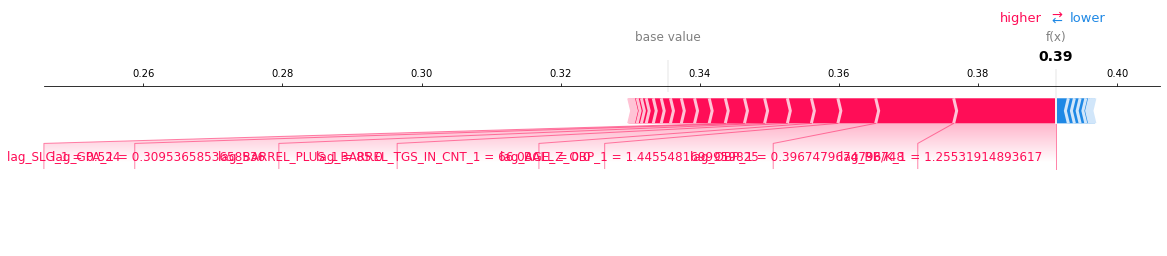

In [13]:
# 이정후
shap.force_plot(explainer.expected_value,
               shap_values[61,:],
               x_test_obp.iloc[61,:],matplotlib=True)

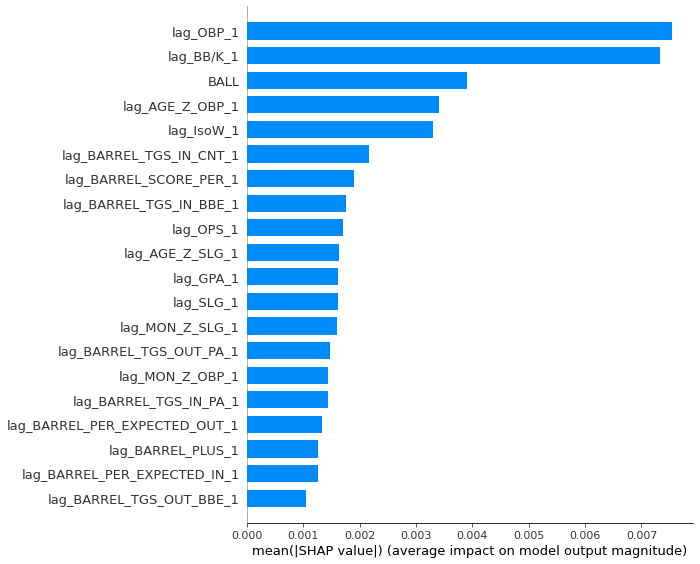

In [14]:
shap.summary_plot(shap_values, x_test_obp, plot_type='bar')

In [15]:
### SLG model: xgb

In [16]:
dt = tr_21_slg_d
train = dt[dt['GYEAR']!=2021]
test = dt[dt['GYEAR']==2021]

In [17]:
test.reset_index(drop=True,inplace=True)
test[test['NAME'].isin(['최정'])]

,GYEAR,PCODE,NAME,lag_OBP_1,lag_SLG_1,lag_OPS_1,lag_AGE_Z_OBP_1,lag_AGE_Z_SLG_1,lag_MON_Z_OBP_1,lag_MON_Z_SLG_1,...,lag_BARREL_OUT_PER_1,lag_BARREL_PER_EXPECTED_OUT_1,lag_BARREL_PER_EXPECTED_IN_1,AGE_GRP_1,AGE_GRP_2,AGE_GRP_3,AGE_GRP_4,MON_GRP,BALL,SLG
90,2021,75847,최정,0.392405,0.538,0.930405,0.957041,1.39344,0.661093,0.913505,...,0.777778,0.052006,0.02381,0.0,0.0,0.0,1.0,1.0,0.0,0.598


In [18]:
cols = [ 'lag_SLG_1', 'lag_OBP_1', 'lag_OPS_1',  'lag_AGE_Z_OBP_1', 'lag_AGE_Z_SLG_1', 'lag_MON_Z_OBP_1','lag_MON_Z_SLG_1', 'lag_IsoP_1', 'lag_IsoW_1', 'lag_BARREL_TGS_OUT_CNT_1', 
                           'lag_BARREL_TGS_IN_CNT_1', 'lag_BARREL_TGS_IN_BBE_1', 'lag_BARREL_TGS_OUT_BBE_1', 'lag_BARREL_TGS_IN_PA_1', 
                           'lag_BARREL_TGS_OUT_PA_1', 'lag_BARREL_PLUS_1', 'lag_BARREL_SCORE_PER_1', 'lag_BARREL_SLG_1', 'lag_BARREL_SLG_PER_PA_1',  'lag_BARREL_SLG_PER_BBE_1', 'lag_BARREL_OUT_PER_1',
                           'MON_GRP', 'BALL', 'lag_BARREL_PER_EXPECTED_OUT_1', 'lag_BARREL_PER_EXPECTED_IN_1']

x_train_slg = train[cols]
x_test_slg = test[cols]
y_train_slg = train['SLG']
y_test_slg = test['SLG']

In [19]:
xgb = xgboost.XGBRegressor(learning_rate = 0.01,
                           colsample_bytree = 0.7,
                           max_depth = 5,
                           min_child_weight = 4,
                           n_estimators = 700,
                           nthread = 4,
                           objective = 'reg:linear',
                           reg_lamda = 1,
                           silent = 1, 
                           subsample = 0.1)

In [20]:
xgb.fit(x_train_slg, y_train_slg)

[04:10:46] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[04:10:46] WARNING: ..\src\learner.cc:541: 
Parameters: { reg_lamda, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             reg_lamda=1, scale_pos_weight=1, silent=1, subsample=0.1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
shap.initjs()
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test_slg)

In [22]:
# 최정
shap.force_plot(explainer.expected_value,
               shap_values[90,:],
               x_test_slg.iloc[90,:])

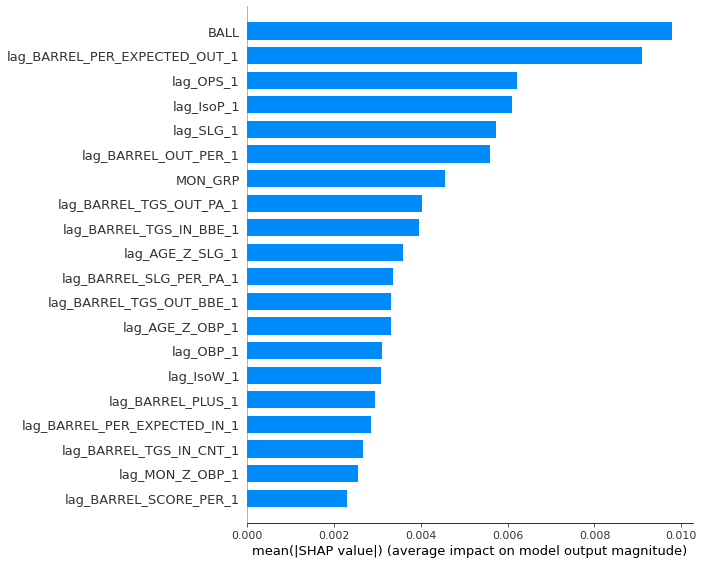

In [23]:
shap.summary_plot(shap_values, x_test_slg,plot_type='bar')